In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_data = pd.read_csv('loan.csv')

/var/folders/pc/jzv6_vb52wx3j8p2ty6yjrbh0000gn/T/ipykernel_5380/2898063344.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


In [18]:
print("First 5 rows of the data:")
print(loan_data.head())

First 5 rows of the data:
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN    

In [19]:
print("\nData types and null values:")
print(loan_data.info())


Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


Check for missing values

In [20]:
missing_values = loan_data.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


Drop columns with a high percentage of missing values

In [21]:
columns_to_drop = missing_values[missing_values > (0.5 * len(loan_data))].index
loan_data_cleaned = loan_data.drop(columns=columns_to_drop, axis=1)

Fill remaining missing values

In [22]:
numerical_columns = loan_data_cleaned.select_dtypes(include=np.number).columns
categorical_columns = loan_data_cleaned.select_dtypes(include='object').columns

In [23]:
loan_data_cleaned[numerical_columns] = loan_data_cleaned[numerical_columns].fillna(loan_data_cleaned[numerical_columns].median())
loan_data_cleaned[categorical_columns] = loan_data_cleaned[categorical_columns].fillna(loan_data_cleaned[categorical_columns].mode().iloc[0])

Univariate Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


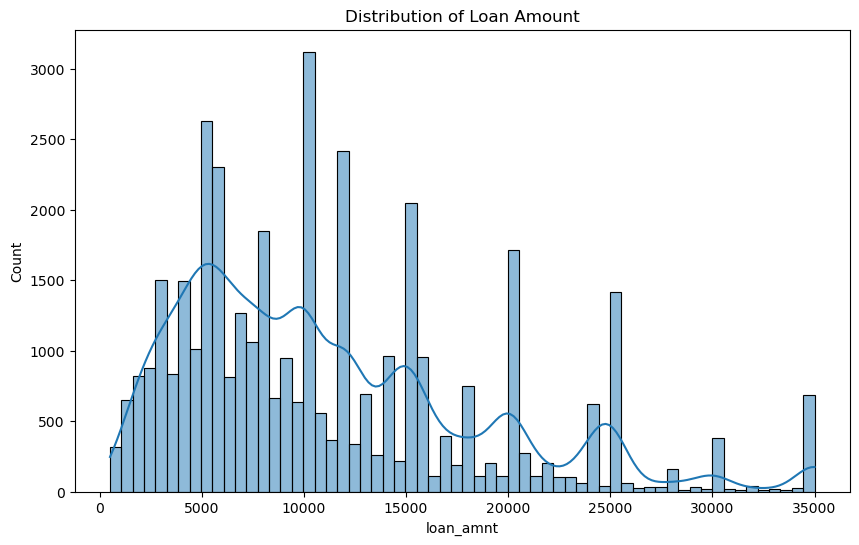

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

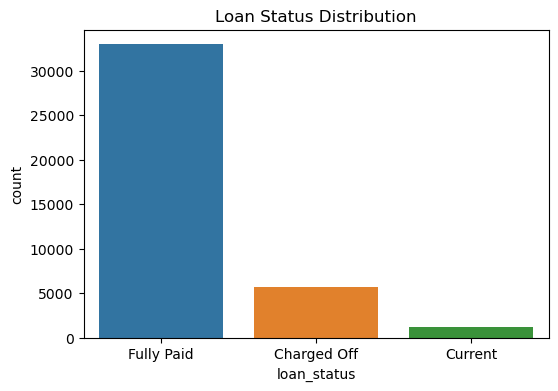

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=loan_data_cleaned)
plt.title('Loan Status Distribution')
plt.show()

Bivariate Analysis

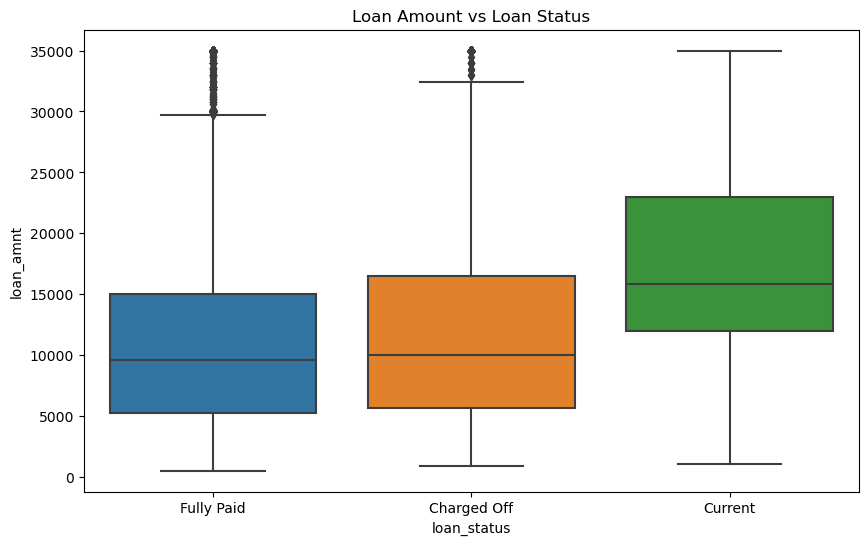

In [26]:
#1
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned)
plt.title('Loan Amount vs Loan Status')
plt.show()


In [29]:
#2
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.rstrip('%').astype('float')


In [31]:
print(loan_data_cleaned['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


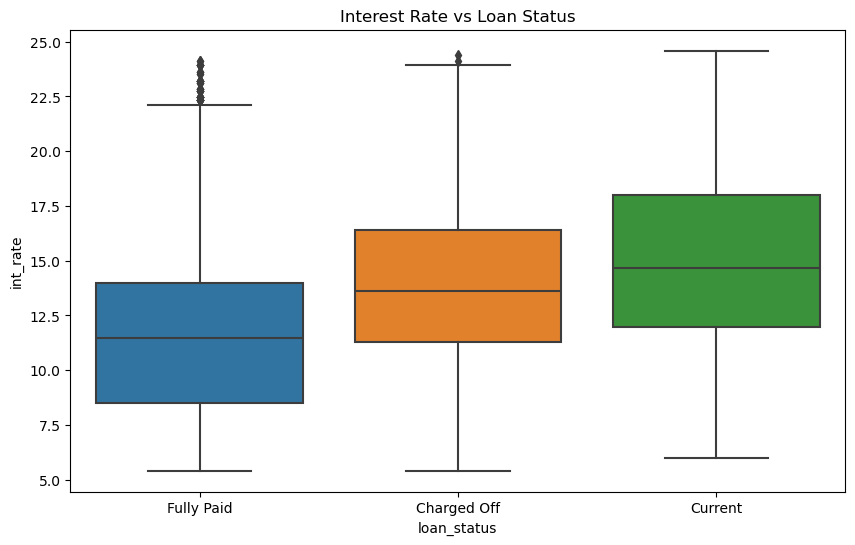

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned)
plt.title('Interest Rate vs Loan Status')
plt.show()

In [33]:
#3
non_numeric_columns = loan_data_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')


In [34]:
loan_data_numeric = loan_data_cleaned.drop(columns=non_numeric_columns, axis=1)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


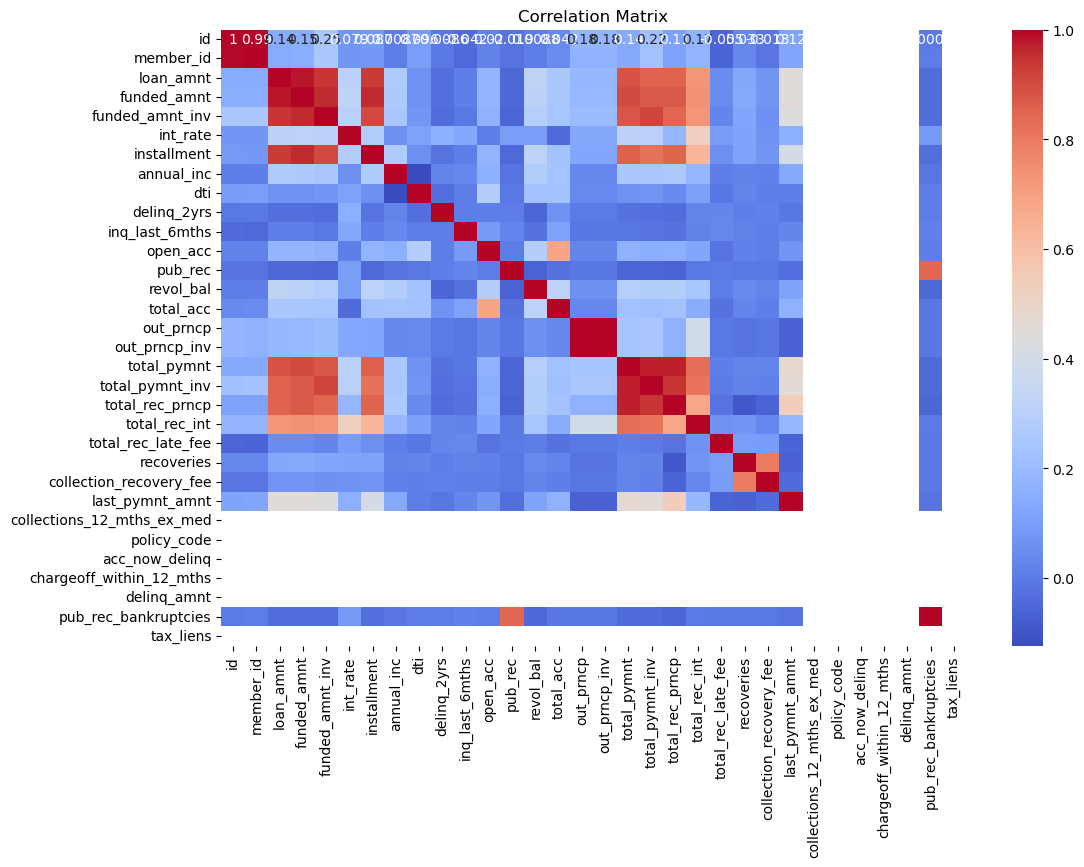

In [35]:
plt.figure(figsize=(12, 8))
corr_matrix = loan_data_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
print("\nSummary of Observations:")
print("1. Loan amount distribution shows most loans fall within a certain range, with a few larger loans.")
print("2. Higher interest rates tend to correlate with 'charged-off' loans, indicating risky applicants are charged higher rates.")
print("3. Loan status analysis shows that most loans are 'fully paid', but there is a significant proportion of 'charged-off' loans.")


Summary of Observations:
1. Loan amount distribution shows most loans fall within a certain range, with a few larger loans.
2. Higher interest rates tend to correlate with 'charged-off' loans, indicating risky applicants are charged higher rates.
3. Loan status analysis shows that most loans are 'fully paid', but there is a significant proportion of 'charged-off' loans.


In [37]:
from scipy.stats import chi2_contingency, f_oneway

# Step 1.1: Chi-Square Test for Categorical Variables
# Categorical variables such as 'grade', 'home_ownership' are tested against 'loan_status'

categorical_cols = ['grade', 'home_ownership', 'purpose']  # You can add more categorical columns
for col in categorical_cols:
    contingency_table = pd.crosstab(loan_data_cleaned[col], loan_data_cleaned['loan_status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {col}: p-value = {p}")
    if p < 0.05:
        print(f"{col} is significant with loan status.")
    else:
        print(f"{col} is not significant with loan status.")

# Step 1.2: ANOVA Test for Numeric Variables
# Numeric variables such as 'loan_amnt', 'int_rate' are tested across loan statuses

numeric_cols = ['loan_amnt', 'int_rate', 'annual_inc']  # Add more numeric columns as needed
loan_status_groups = loan_data_cleaned.groupby('loan_status')

for col in numeric_cols:
    group_data = [group[col].dropna() for name, group in loan_status_groups]
    f_stat, p_value = f_oneway(*group_data)
    print(f"ANOVA Test for {col}: p-value = {p_value}")
    if p_value < 0.05:
        print(f"{col} is significant with loan status.")
    else:
        print(f"{col} is not significant with loan status.")


Chi-Square Test for grade: p-value = 0.0
grade is significant with loan status.
Chi-Square Test for home_ownership: p-value = 6.262859234162645e-16
home_ownership is significant with loan status.
Chi-Square Test for purpose: p-value = 5.473057657367813e-78
purpose is significant with loan status.
ANOVA Test for loan_amnt: p-value = 1.5758479421827864e-187
loan_amnt is significant with loan status.
ANOVA Test for int_rate: p-value = 0.0
int_rate is significant with loan status.
ANOVA Test for annual_inc: p-value = 1.557770358717588e-17
annual_inc is significant with loan status.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare the data for modeling
# Convert 'loan_status' to binary (1 for 'Charged-off', 0 for 'Fully Paid')
loan_data_cleaned['loan_status_binary'] = loan_data_cleaned['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Select features based on the significance tests and domain knowledge
# Here, we'll use 'loan_amnt', 'int_rate', 'grade', 'home_ownership' as example features
features = ['loan_amnt', 'int_rate', 'grade', 'home_ownership']  # Add or remove based on significance

# Convert categorical features to numeric using one-hot encoding
loan_data_cleaned_encoded = pd.get_dummies(loan_data_cleaned[features], drop_first=True)

# Define the target variable and features
X = loan_data_cleaned_encoded
y = loan_data_cleaned['loan_status_binary']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      6850
           1       0.00      0.00      0.00      1094

    accuracy                           0.86      7944
   macro avg       0.43      0.50      0.46      7944
weighted avg       0.74      0.86      0.80      7944

Confusion Matrix:
[[6850    0]
 [1094    0]]
Accuracy Score:
0.8622860020140987


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
